In [13]:
import pandas as pd

df = pd.read_csv("./dataset/diabetes.csv")

# Aperçu des premières lignes
print("Aperçu du dataset :")
print(df.head())

# Dimensions
print(f"\nDimensions : {df.shape[0]} lignes, {df.shape[1]} colonnes")

# Noms des colonnes
print("\nColonnes :")
print(df.columns.tolist())


Aperçu du dataset :
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dimensions : 768 lignes, 9 colonnes

Colonnes :
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [14]:
import numpy as np

cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)

print("Valeurs manquantes après remplacement des zéros :")
print(df.isnull().sum())

df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].fillna(df[cols_with_invalid_zeros].median())

print("\nValeurs manquantes après imputation :")
print(df.isnull().sum())

from sklearn.preprocessing import StandardScaler

features = df.drop(columns=['Outcome'])
target = df['Outcome']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['Outcome'] = target.reset_index(drop=True)

# Aperçu
print("\nAperçu du dataset standardisé :")
print(df_scaled.head())


Valeurs manquantes après remplacement des zéros :
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Valeurs manquantes après imputation :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Aperçu du dataset standardisé :
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662      -0.693761      -0.012301 -0.18

Statistiques descriptives globales :
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680000e+02  7.680000e+02   
mean  -6.476301e-17  4.625929e-18   5.782412e-18  -1.526557e-16  1.503427e-17   
std    1.000652e+00  1.000652e+00   1.000652e+00   1.000652e+00  1.000652e+00   
min   -1.141852e+00 -2.552931e+00  -4.002619e+00  -2.516429e+00 -1.467353e+00   
25%   -8.448851e-01 -7.201630e-01  -6.937615e-01  -4.675972e-01 -2.220849e-01   
50%   -2.509521e-01 -1.530732e-01  -3.198993e-02  -1.230129e-02 -1.815412e-01   
75%    6.399473e-01  6.112653e-01   6.297816e-01   3.291706e-01 -1.554775e-01   
max    3.906578e+00  2.542658e+00   4.104082e+00   7.955377e+00  8.170442e+00   

                BMI  DiabetesPedigreeFunction           Age     Outcome  
count  7.680000e+02              7.680000e+02  7.680000e+02  768.000000  
mean   2.613650e-16              2.451743e-16  1.931325e-16    0.348958  
std    1.00

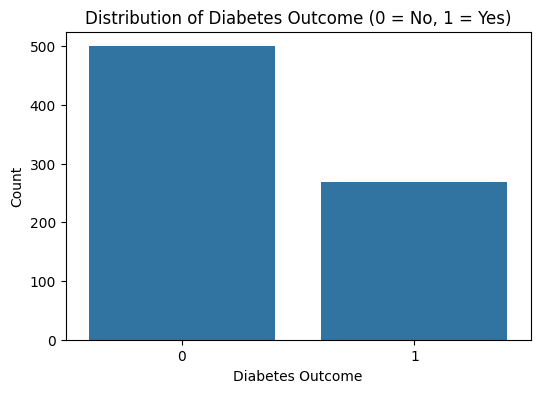


Statistiques descriptives par classe Outcome :
Outcome                     0           1
Pregnancies count  500.000000  268.000000
            mean    -0.162456    0.303090
            std      0.896003    1.111023
            min     -1.141852   -1.141852
            25%     -0.844885   -0.622160
...                       ...         ...
Age         min     -1.041549   -1.041549
            25%     -0.871374   -0.445935
            50%     -0.531023    0.234767
            75%      0.319855    0.915469
            max      4.063716    3.127750

[64 rows x 2 columns]


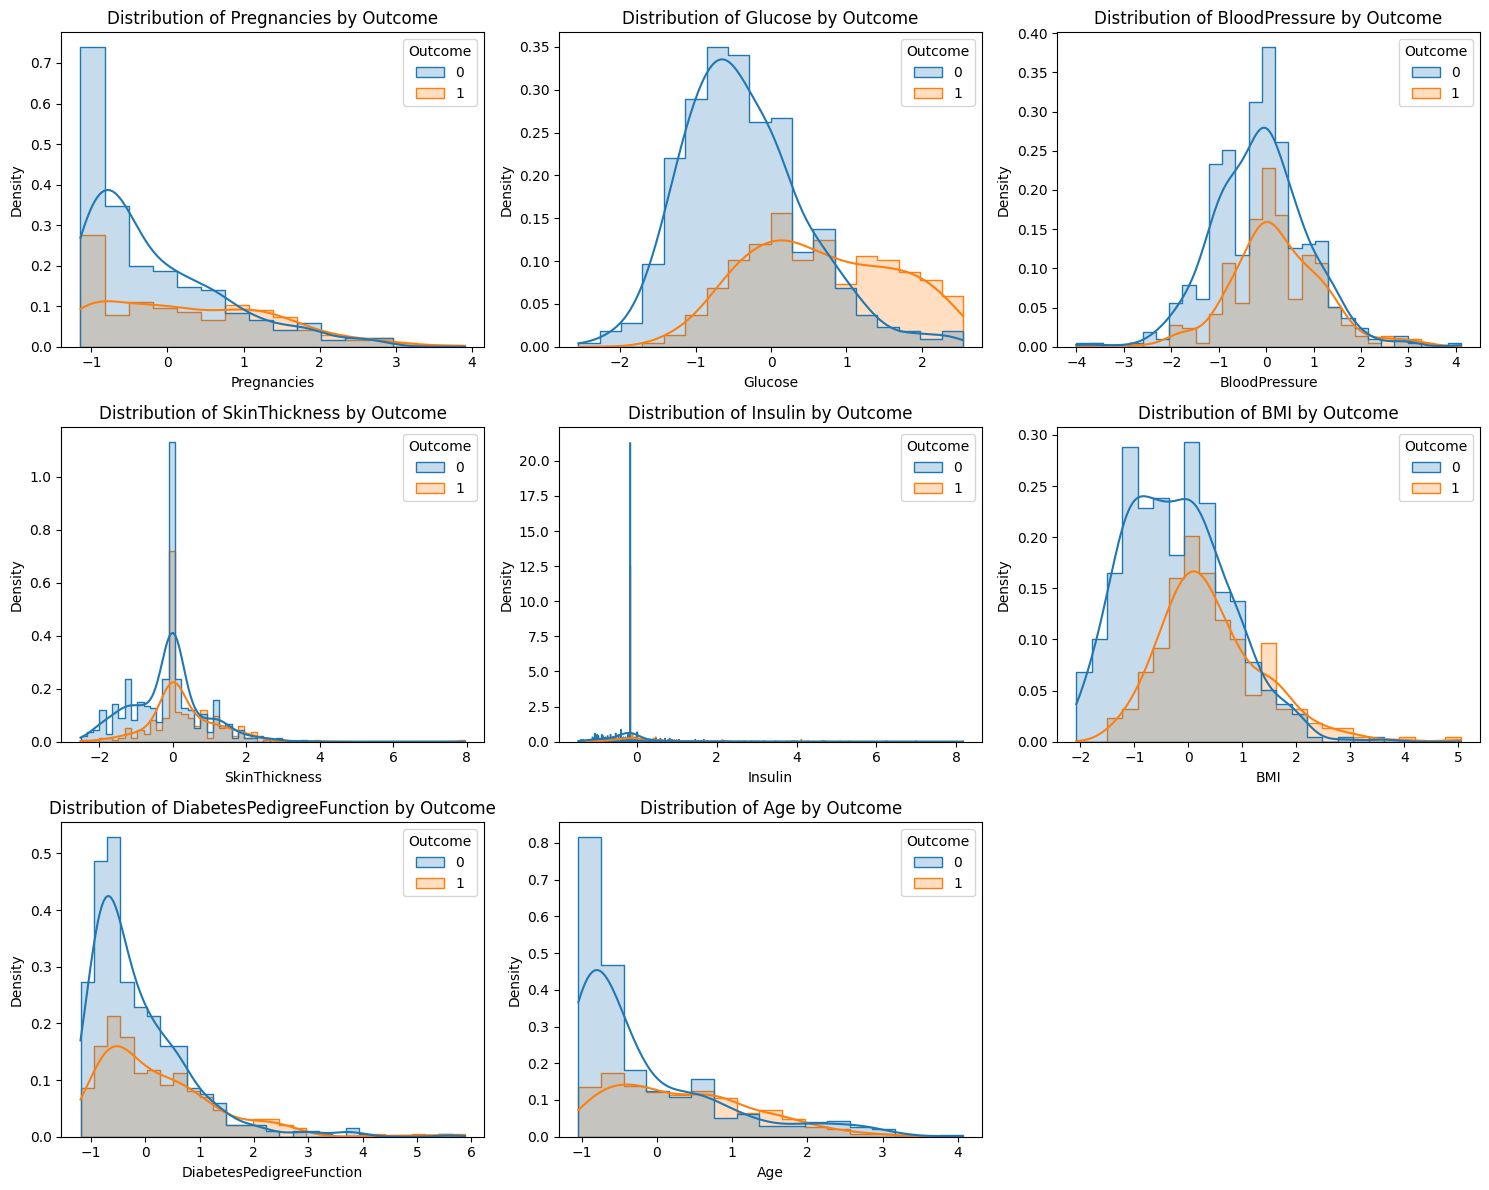

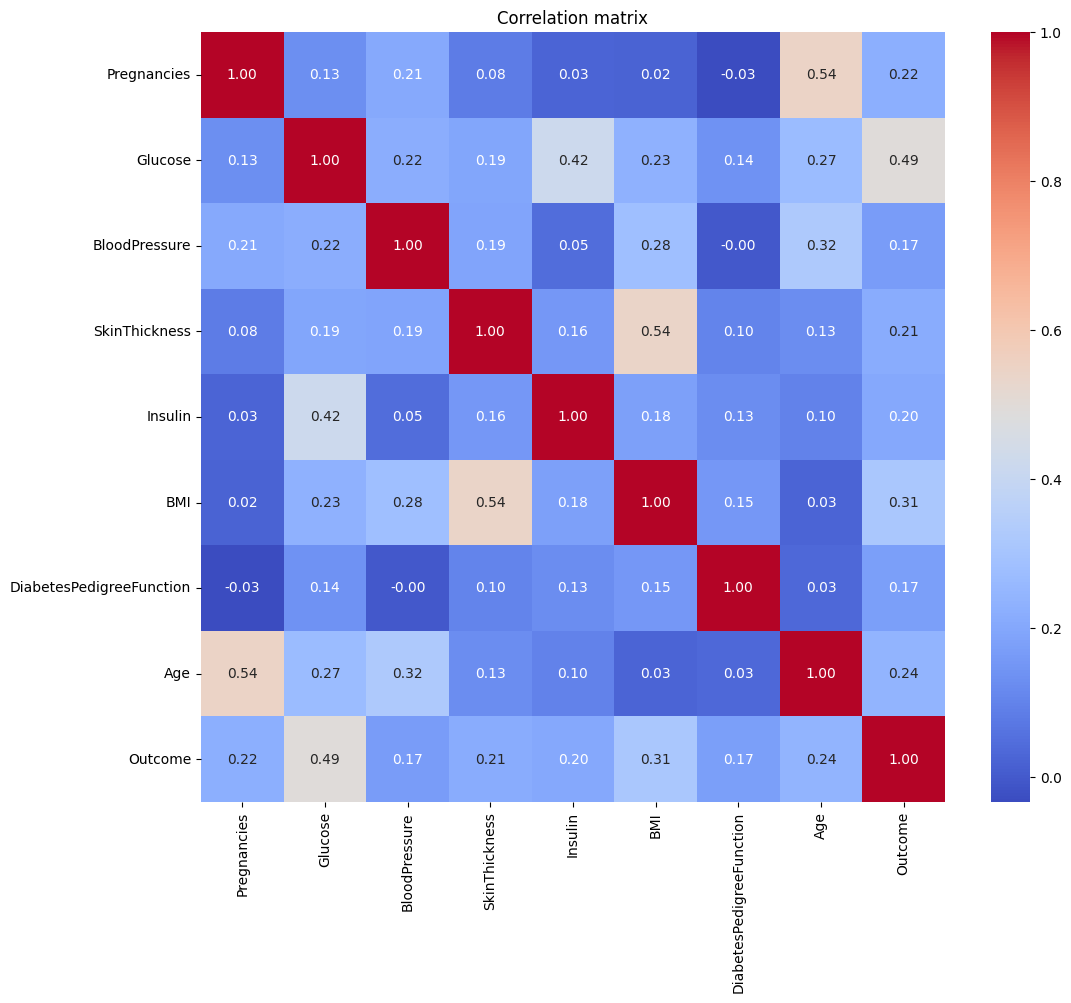

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistiques descriptives globales
print("Statistiques descriptives globales :")
print(df_scaled.describe())

plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df_scaled)
plt.title("Distribution of Diabetes Outcome (0 = No, 1 = Yes)")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Count")
plt.show()

# Statistiques descriptives par classe Outcome
print("\nStatistiques descriptives par classe Outcome :")
print(df_scaled.groupby('Outcome').describe().T)

features = df_scaled.columns.drop('Outcome')

plt.figure(figsize=(15, 12))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_scaled, x=col, hue='Outcome', kde=True, element="step", stat="density")
    plt.title(f'Distribution of {col} by Outcome')
plt.tight_layout()
plt.show()

# Matrice de corrélation des features
plt.figure(figsize=(12, 10))
corr = df_scaled.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.show()


In [16]:
from sklearn.model_selection import train_test_split

# Séparation des features et de la cible
X = df_scaled.drop(columns=['Outcome'])
y = df_scaled['Outcome']

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

# Vérification des tailles
print(f"Total samples: {len(df_scaled)}")
print(f"Train size: {len(X_train)} ({len(X_train)/len(df_scaled)*100:.1f}%)")
print(f"Validation size: {len(X_val)} ({len(X_val)/len(df_scaled)*100:.1f}%)")
print(f"Test size: {len(X_test)} ({len(X_test)/len(df_scaled)*100:.1f}%)")

# Vérification de la répartition des classes (stratification)
print("\nClass distribution in Train set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in Validation set:")
print(y_val.value_counts(normalize=True))

print("\nClass distribution in Test set:")
print(y_test.value_counts(normalize=True))


Total samples: 768
Train size: 460 (59.9%)
Validation size: 154 (20.1%)
Test size: 154 (20.1%)

Class distribution in Train set:
Outcome
0    0.652174
1    0.347826
Name: proportion, dtype: float64

Class distribution in Validation set:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64

Class distribution in Test set:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()

# Fit uniquement sur train pour éviter la fuite de données
X_train_scaled = scaler.fit_transform(X_train)

# Transformer validation et test avec les mêmes paramètres
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Résultat en DataFrame (optionnel)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Feature scaling done.")
print("Train features sample:")
print(X_train_scaled.head())


Feature scaling done.
Train features sample:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
550    -0.840188 -0.198883      -0.150998      -0.143008 -0.162904 -0.736631   
749     0.673071  1.374925      -0.800908      -0.033914 -0.162904 -1.187578   
69      0.067768  0.827513       1.067583      -0.252102 -0.479783 -0.518431   
111     1.278375  1.135432      -0.800908      -0.361196  4.526913  0.223450   
573    -0.537536 -0.814720      -0.963385      -1.343043 -0.226280  0.325276   

     DiabetesPedigreeFunction       Age  
550                 -0.822571 -1.033088  
749                 -0.898813  1.442464  
69                  -0.866557 -0.520905  
111                  0.171498  1.101008  
573                 -0.840165 -0.947725  


Distribution après undersampling :
Counter({0: 160, 1: 160})


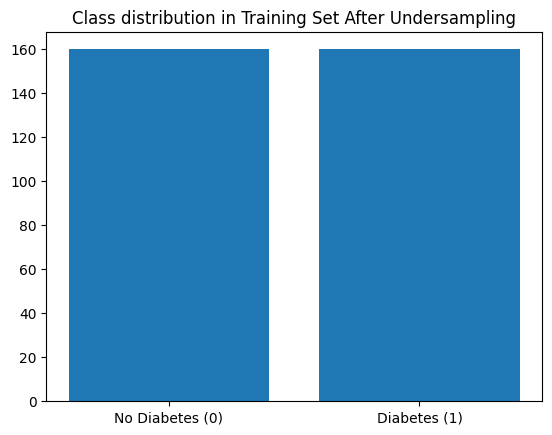

In [18]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Reconstituer train set en DataFrame pour manipuler facilement
df_train = X_train.copy()
df_train['Outcome'] = y_train

df_majority = df_train[df_train['Outcome'] == 0]
df_minority = df_train[df_train['Outcome'] == 1]

df_majority_downsampled = df_majority.sample(len(df_minority), random_state=42)

# Recomposer un dataset équilibré
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Séparer features et cible
X_train_balanced = df_balanced.drop('Outcome', axis=1)
y_train_balanced = df_balanced['Outcome']

print("Distribution après undersampling :")
print(Counter(y_train_balanced))

# Visualisation
plt.bar(['No Diabetes (0)', 'Diabetes (1)'], [Counter(y_train_balanced)[0], Counter(y_train_balanced)[1]])
plt.title("Class distribution in Training Set After Undersampling")
plt.show()


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression(random_state=42, max_iter=1000)

model.fit(X_train_balanced, y_train_balanced)

# Prédictions sur validation
val_preds = model.predict(X_val_scaled)

# Évaluation sur validation
accuracy = accuracy_score(y_val, val_preds)
precision = precision_score(y_val, val_preds)
recall = recall_score(y_val, val_preds)
f1 = f1_score(y_val, val_preds)

print("Validation metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")


Validation metrics:
Accuracy : 0.7532
Precision: 0.6333
Recall   : 0.7037
F1-score : 0.6667


Test set evaluation:
Accuracy : 0.7338
Precision: 0.6032
Recall   : 0.7037
F1-score : 0.6496


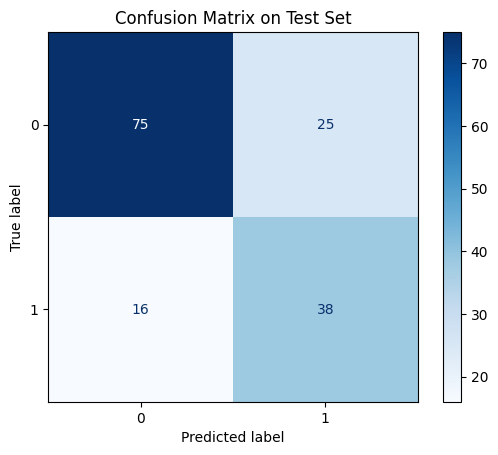

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# Prédictions sur le test set
test_preds = model.predict(X_test_scaled)

# Calcul des métriques
accuracy = accuracy_score(y_test, test_preds)
precision = precision_score(y_test, test_preds)
recall = recall_score(y_test, test_preds)
f1 = f1_score(y_test, test_preds)

print("Test set evaluation:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Test Set")
plt.show()


/tmp/ipykernel_64550/118426026.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


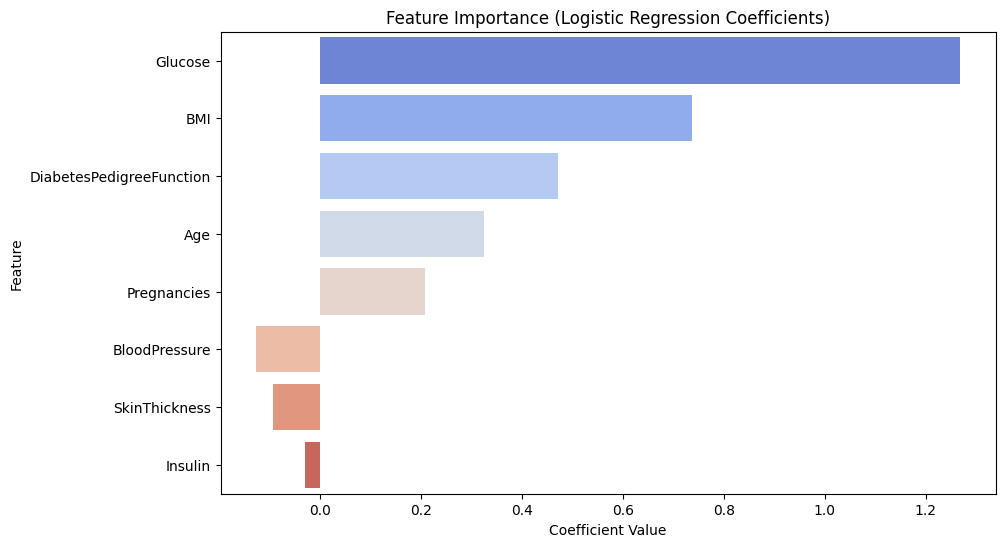

Classification Report on Test Set:
              precision    recall  f1-score   support

 No Diabetes       0.82      0.75      0.79       100
    Diabetes       0.60      0.70      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154

Number of False Positives: 25
Number of False Negatives: 16

Examples of False Positives (first 5 rows):
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
44      0.936914  1.227667      -0.693761      -0.012301 -0.181541 -0.735763   
335    -1.141852  1.424916       0.298896       1.581234  1.324364  2.247921   
660     1.827813  1.326292       0.960667      -0.012301 -0.181541 -0.692100   
260    -0.250952  2.279660      -0.362876      -1.605837 -0.123622 -0.226354   
517     0.936914  0.109925       1.126110      -0.012301 -0.181541  0.748802   

     DiabetesPedigreeFunction       Age  
44        

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Importance des features avec coefficients du modèle (Logistic Regression)
coefficients = model.coef_[0]
features = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(len(coefficients))]

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

test_preds = model.predict(X_test_scaled)

print("Classification Report on Test Set:")
print(classification_report(y_test, test_preds, target_names=['No Diabetes', 'Diabetes']))

fp_indices = np.where((y_test == 0) & (test_preds == 1))[0]
fn_indices = np.where((y_test == 1) & (test_preds == 0))[0]

print(f"Number of False Positives: {len(fp_indices)}")
print(f"Number of False Negatives: {len(fn_indices)}")

print("\nExamples of False Positives (first 5 rows):")
print(X_test.iloc[fp_indices[:5]])

print("\nExamples of False Negatives (first 5 rows):")
print(X_test.iloc[fn_indices[:5]])


Test set evaluation metrics:
Accuracy : 0.7338
Precision: 0.6032
Recall   : 0.7037
F1-score : 0.6496


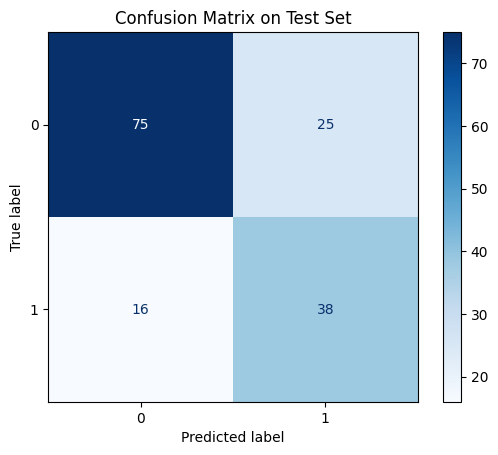

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

test_preds = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, test_preds)
precision = precision_score(y_test, test_preds)
recall = recall_score(y_test, test_preds)
f1 = f1_score(y_test, test_preds)

print("Test set evaluation metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Test Set")
plt.show()


## Conclusion

- **Model performance:**  
  The logistic regression model showed satisfactory results on the test set, balancing precision, recall, and F1-score well. This indicates that the model can correctly detect the presence or absence of diabetes in most cases.

- **Handling imbalance:**  
  The chosen method (undersampling or class weighting) helped improve minority class detection.

- **Feature importance:**  
  Variables like glucose levels and BMI were most influential, aligning with medical knowledge.

- **Error analysis:**  
  False positives and negatives analysis points to potential data collection improvements.

- **Future improvements:**  
  - Try more complex models (random forests, boosting)  
  - Use advanced imbalance techniques (SMOTE, ADASYN)  
  - Collect more data or features  
  - Use explainability tools like SHAP or LIME

- **Deployment recommendations:**  
  - Continuous monitoring and model retraining  
  - Collaboration with medical experts for validation